# Testing Distributions 

<div class="alert alert-success">
Sometimes it may be useful (or necessary) to formally test whether some data you observe follows a particular distribution.
</div>

Perhaps most commonly, if you are using statistical tests that assume data to have a particular distribution, you need to test whether this is indeed the case. 

In [1]:
# Imports
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import normaltest

In [2]:
# Set up a helper function for checking p-values against an alpha level, and printing result
def check_p_val(p_val, alpha):

    if p_val < alpha:
        print('We have evidence to reject the null hypothesis.')
    else:
        print('We do not have evidence to reject the null hypothesis.')

Here, we will focus on the most common case: testing whether a dataset is normally distributed. 

In [3]:
# Create a dataset of normally distributed data
d1 = stats.norm.rvs(size=100000)

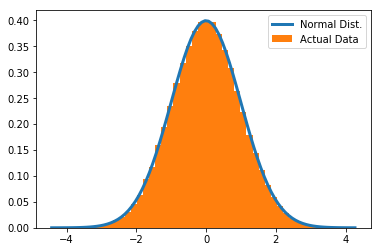

In [4]:
# Plot a histogram of the observed data
#  Included is expected distribution, if the data is normally distributed, with the same mean and std of the data. 
xs = np.arange(d1.min(), d1.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(d1), np.std(d1))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(d1, 50, normed=True, label='Actual Data');
plt.legend();

In [5]:
# In scipy, the 'normaltest' function tests whether a sample differs from a normal distribution
#  The null hypothesis is that the data are normally distributed.
#    We can use normaltest to check this null - do we have to reject the null (to claim the data are not normal).
#  It does using a combined statistics comparing the skew and kurtosis of the observed
#    data, as compared to as expected under a normal distribution. 
normaltest?

In [6]:
# Run normal test on the data
stat, p_val = normaltest(d1)

In [7]:
# Check the p-value of the normaltest
print('\nNormaltest p value is: {:1.2e} \n'.format(p_val))

# With alpha value of 0.05, how should we proceed
check_p_val(p_val, alpha=0.05)


Normaltest p value is: 1.34e-01 

We do not have evidence to reject the null hypothesis.


#### Different Distributions

Visually inspecting datasets can give you a quick sense about whether they are normally distributed or not. 

However, visual inspection is not enough, and can be misleading, since non-normally data can 'look normal'.

As well as visualling checking data when it looks pretty normal, it is important to perform other checks.

For example, under some paramters, the Beta distributed data can look like it is normally distibruted. 

In [8]:
# Generate some data from a beta distribution
d2 = stats.beta.rvs(7, 10, size=100000)

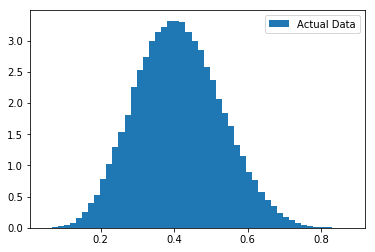

In [9]:
# Plot a histogram of the observed data
plt.hist(d2, 50, normed=True, label='Actual Data');
plt.legend();

This data, as plotted above, we might think looks quite normal, based on the visualization. 

However, there are more specific checks that we can do. 

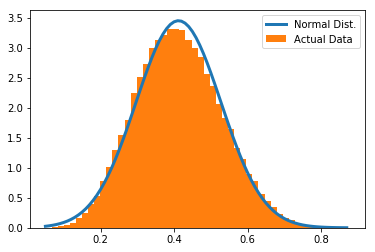

In [10]:
# Plot the data with with expected distribution, under the hypothesis that it is normally distributed. 
#  The blue line is the expected data density, with the same mean and standard deviation, if the data are normal. 
xs = np.arange(d2.min(), d2.max(), 0.01)
fit = stats.norm.pdf(xs, np.mean(d2), np.std(d2))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(d2, 50, normed=True, label='Actual Data');
plt.legend();

# Note that we can see *some* differences, when plotting the PDF
#  However, if you turn off the PDF plot, we might guess these data look pretty normal

In [11]:
# Run normal test on the data
stat, p_val = normaltest(d2)

In [12]:
# Check the p-value of the normaltest
print('\nNormaltest p value is: {:1.2e} \n'.format(p_val))

# With alpha value of 0.05, how should we proceed
check_p_val(p_val, alpha=0.05)


Normaltest p value is: 2.17e-184 

We have evidence to reject the null hypothesis.


#### Non-Normal Data

In this example, the plot is ambiguous, but 'normaltest' suggests these data are actually very unlikely to come from a normal distribution. 

In this case, we happen to know that this is indeed true, as the 'ground truth' of the data is that they were generated from a beta distribution.

Therefore, using this data in statistical tests that expect normally distributed inputs is invalid, since we have violated the assumptions upon which these tests are based. We will have to use different methods to perform statistical comparisons with these data.

### Testing other distributions

More generally, you can use the Kolmogorov-Smirnov test to check if a set of data has some other distribution (that you specificy). 

This test is implemented in scipy, and you can explore using it. 

In [13]:
from scipy.stats import kstest

In [14]:
# Check out the documentation for kstest
kstest?

The kstest has a similar form to the normaltest, in this case we are comparing a sample of data, to a specified distribution. 

The null hypothesis is that the data comes from the specified distribution. 

If we reject the null, with some preset alpha value, we can conclude that the data do not conform to the tested distribution.

In [15]:
# Let's continue using our data from above, from the beta distribution. 
#   We can confirm kstest considers it not normally distributed  
stat, p_val = kstest(d2, 'norm')
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.05)

Statistic: 	0.56 
P-Value: 	0.00e+00

We have evidence to reject the null hypothesis.


In [16]:
# Now compare the data to the beta distribution.
#   Note that in this case, we have to specify some parameters for the beta distribution we are testing against
stat, p_val = kstest(d2, 'beta', [7, 10])
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.05)

Statistic: 	0.00 
P-Value: 	1.69e-01

We do not have evidence to reject the null hypothesis.
